# 1. デジタルヘルスメータの液晶盤LED輪郭部分を抽出すること

In [1]:
# import the necessary packages
from matplotlib import pyplot as plt
from imutils.perspective import four_point_transform
from imutils import contours
import imutils
import cv2

## 1.1. 方法1：Cannyアルゴリズム

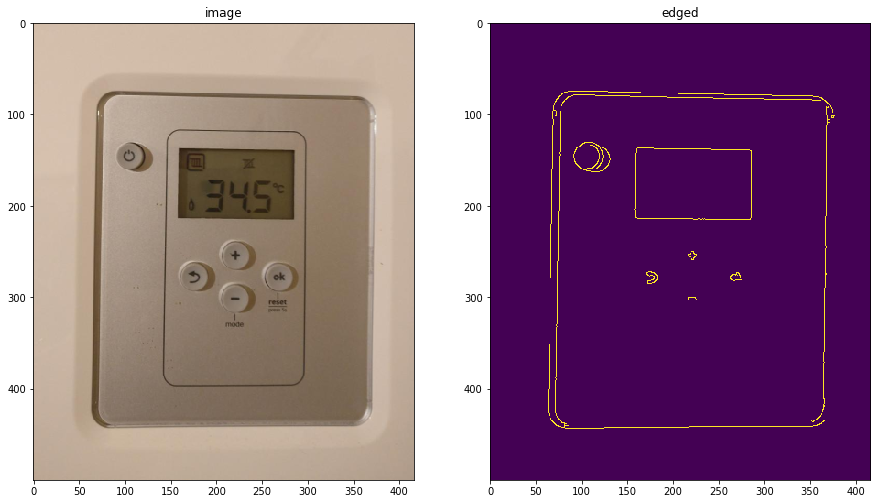

In [15]:
# load the example image
image = cv2.imread("example.jpg")
plt.figure(figsize=(15,15),)

# pre-process the image by resizing it, converting it to graycale, blurring it, and computing an edge map
image = imutils.resize(image, height=500)
_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1), plt.title('image'), plt.imshow(_image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 50, 200, 255)

plt.subplot(1, 2, 2), plt.title('edged'), plt.imshow(edged)
plt.show()

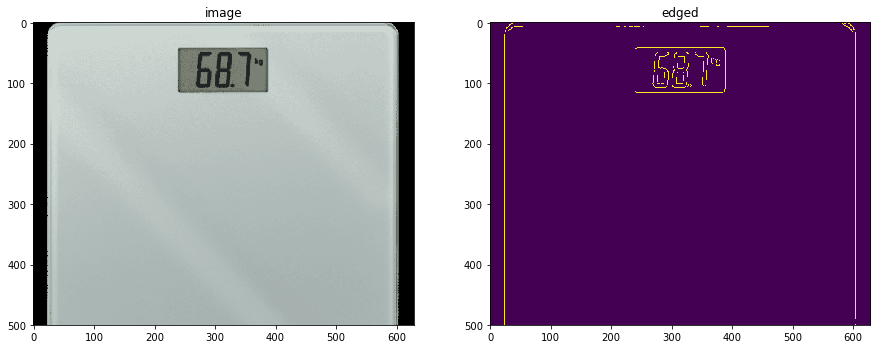

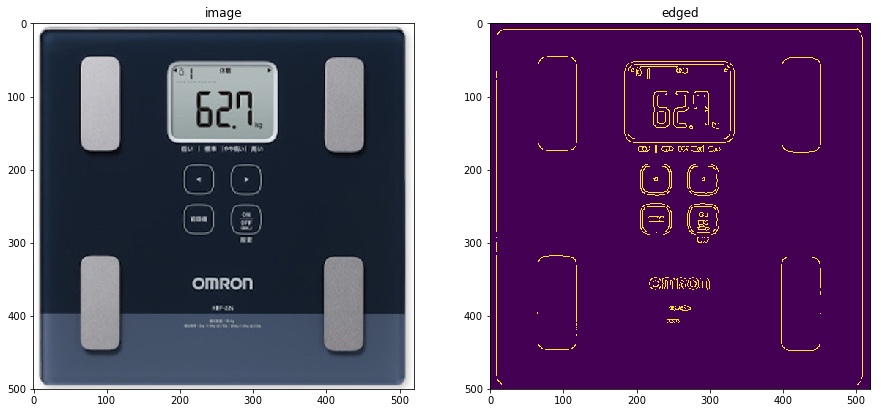

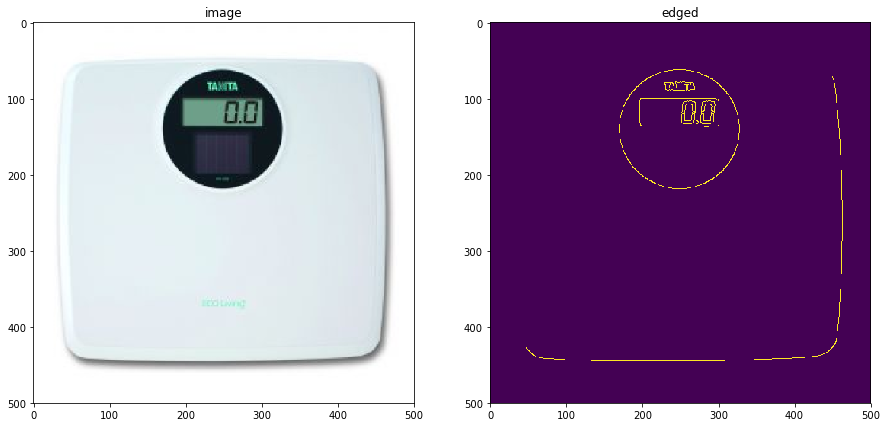

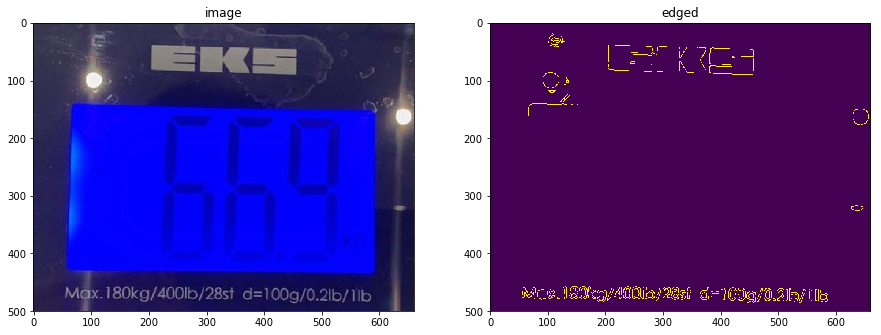

## 1.2. 方法2：二値化の閾値調整（adaptiveアルゴリズム阈值处理）

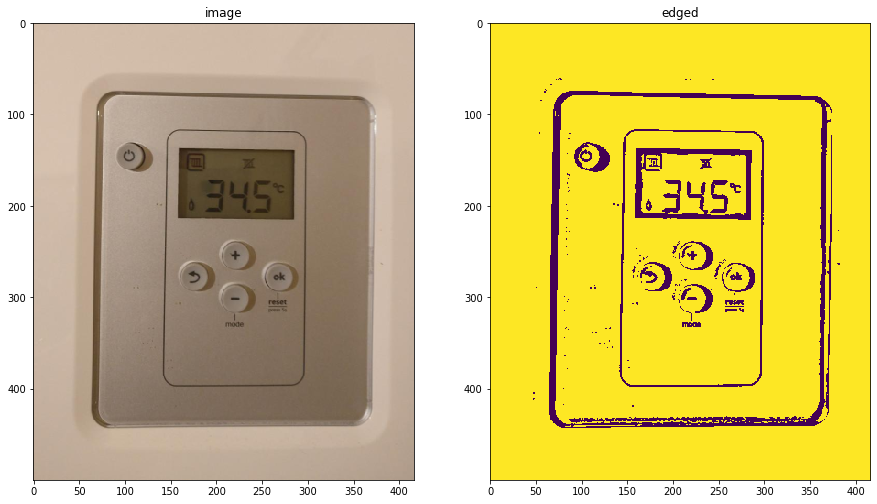

In [13]:
# load the example image
image = cv2.imread("example.jpg")
plt.figure(figsize=(15,15),)

image = imutils.resize(image, height=500)
_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1), plt.title('image'), plt.imshow(_image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edged = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 17, 7)

plt.subplot(1, 2, 2), plt.title('edged'), plt.imshow(edged)
plt.show()

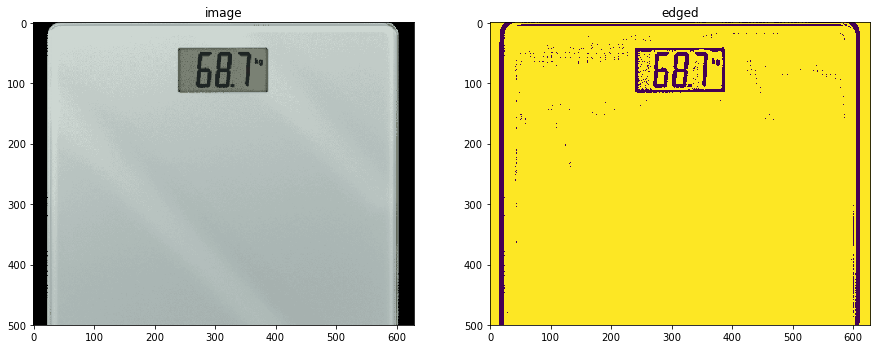

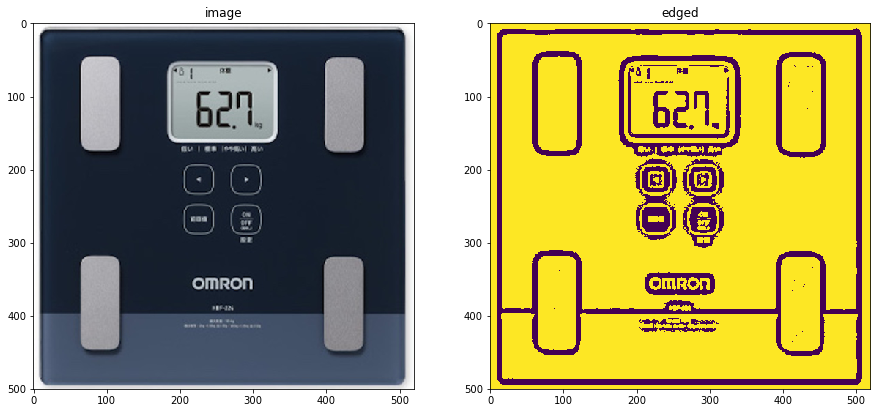

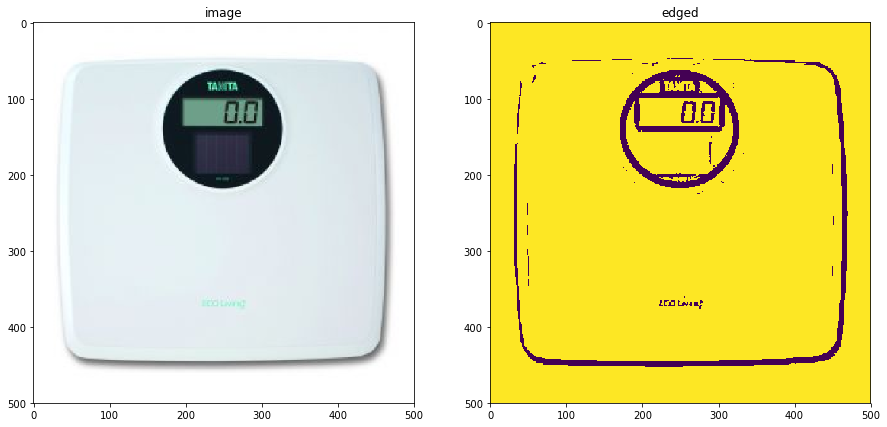

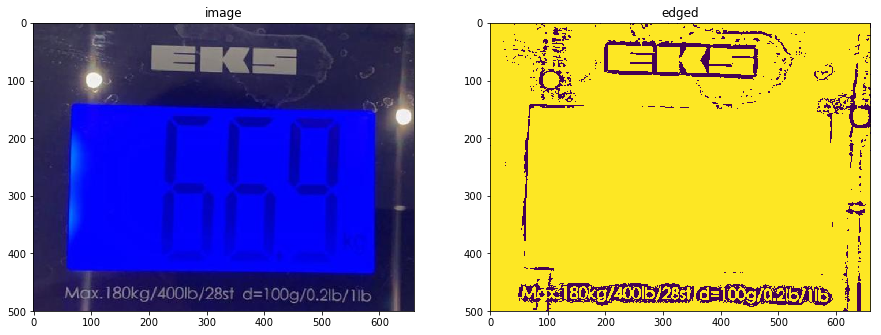

## 1.3. 方法3：二値化の閾値調整（最大数のピクセル値阈值处理）

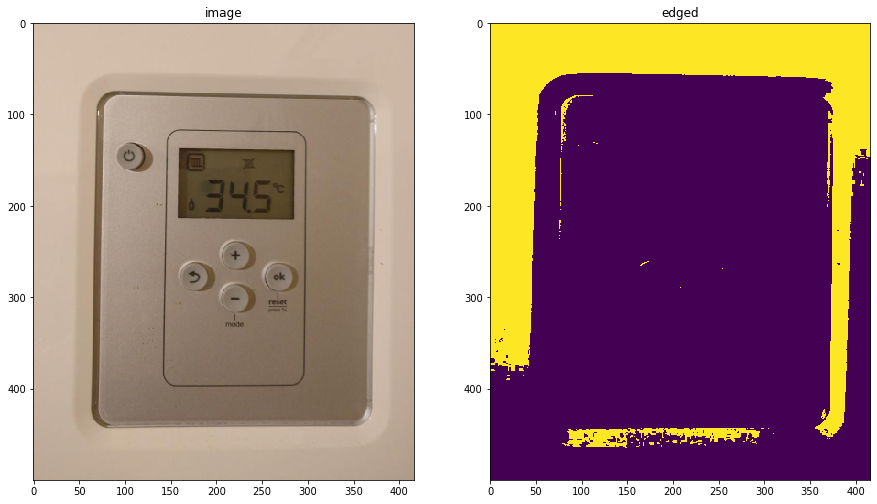

In [14]:
# load the example image
image = cv2.imread("example.jpg")
plt.figure(figsize=(15,15),)

image = imutils.resize(image, height=500)
_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1), plt.title('image'), plt.imshow(_image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# edged = cv2.Canny(blurred, 50, 200, 255)

hist = cv2.calcHist([gray], [0], None, [256], [0,256])
#plt.hist(hist.ravel(), 256, [0,256])
#plt.savefig(filename + "_hist.png")
#plt.show()
min_val, max_val, min_index, max_index = cv2.minMaxLoc(hist)
ret, edged = cv2.threshold(gray, int(max_index[1])-7, 255, cv2.THRESH_BINARY)

plt.subplot(1, 2, 2), plt.title('edged'), plt.imshow(edged)
plt.show()

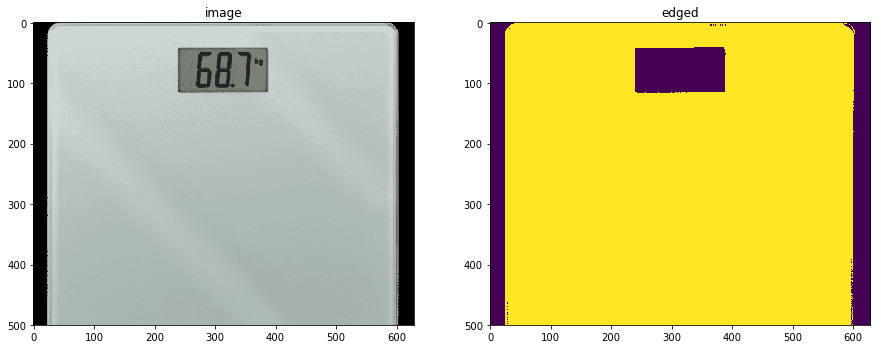

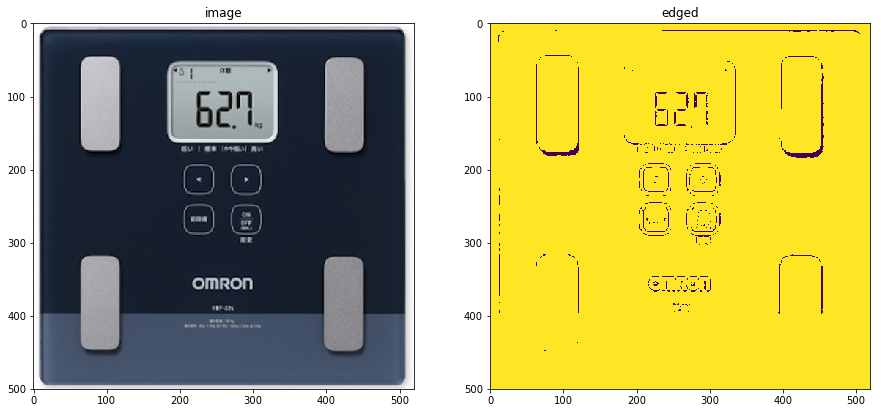

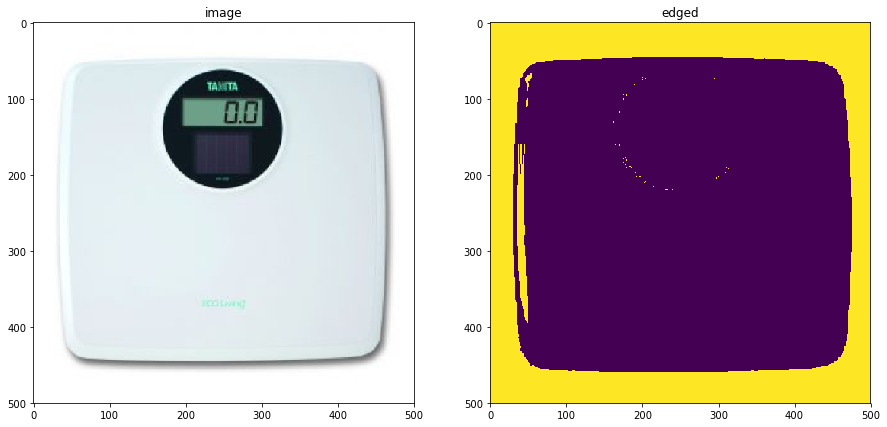

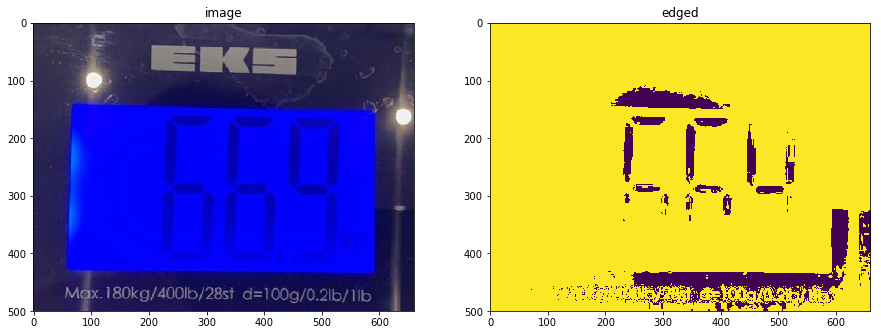

# 2. 画像の歪み補正こと

液晶盤LED輪郭部分を抽出すると、画像の歪み補正は難しくない。

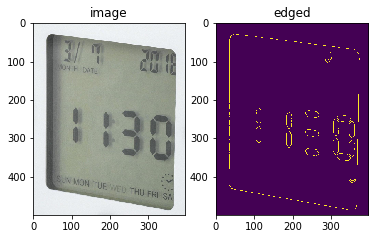

In [34]:
# load the example image
image = cv2.imread("digital-clock.jpg")
# plt.figure(figsize=(15,15),)

# pre-process the image by resizing it, converting it to graycale, blurring it, and computing an edge map
image = imutils.resize(image, height=500)
_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1), plt.title('image'), plt.imshow(_image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 50, 200, 255)

plt.subplot(1, 2, 2), plt.title('edged'), plt.imshow(edged)
plt.show()

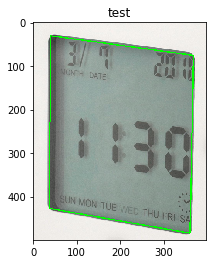

In [35]:
# find contours in the edge map, then sort them by their size in descending order
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
displayCnt = None
max_countour_area = image.shape[0] * image.shape[1]
min_area_found = max_countour_area * 0.1

# loop over the contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)

    # if the contour has four vertices, then we have found
    # the thermostat display
    if len(approx) == 4: # and (min_area_found < cv2.contourArea(approx)):
        displayCnt = approx
        break

# plt.figure(figsize=(15,15),)
plt.subplot(1, 1, 1), plt.title('test'), plt.imshow(image)
plt.show()

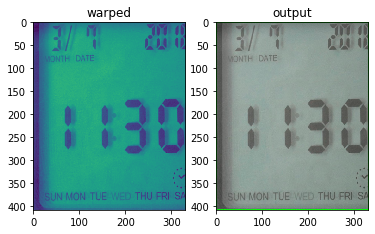

In [36]:
# extract the thermostat display, apply a perspective transform to it
warped = four_point_transform(gray, displayCnt.reshape(4, 2))
output = four_point_transform(image, displayCnt.reshape(4, 2))

plt.subplot(1, 2, 1), plt.title('warped'), plt.imshow(warped)
plt.subplot(1, 2, 2), plt.title('output'), plt.imshow(output)
plt.show()

# 3. 数値データを抽出すること

In [ ]:
# define the dictionary of digit segments so we can identify
# each digit on the thermostat
DIGITS_LOOKUP = {
	(1, 1, 1, 0, 1, 1, 1): 0,
	(0, 0, 1, 0, 0, 1, 0): 1,
	(1, 0, 1, 1, 1, 1, 0): 2,
	(1, 0, 1, 1, 0, 1, 1): 3,
	(0, 1, 1, 1, 0, 1, 0): 4,
	(1, 1, 0, 1, 0, 1, 1): 5,
	(1, 1, 0, 1, 1, 1, 1): 6,
	(1, 0, 1, 0, 0, 1, 0): 7,
	(1, 1, 1, 1, 1, 1, 1): 8,
	(1, 1, 1, 1, 0, 1, 1): 9
}

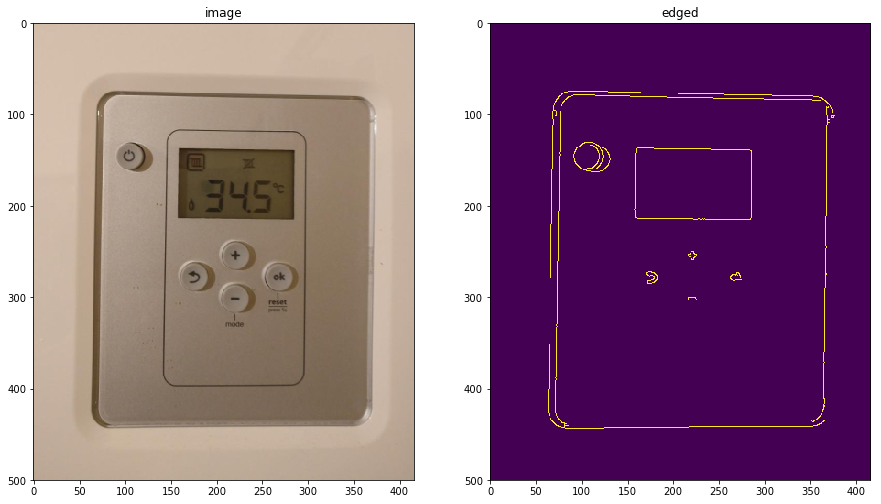

In [6]:
# load the example image
image = cv2.imread("example.jpg")
plt.figure(figsize=(15,15),)

# pre-process the image by resizing it, converting it to graycale, blurring it, and computing an edge map
image = imutils.resize(image, height=500)
_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1), plt.title('image'), plt.imshow(_image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 50, 200, 255)

plt.subplot(1, 2, 2), plt.title('edged'), plt.imshow(edged)
plt.show()

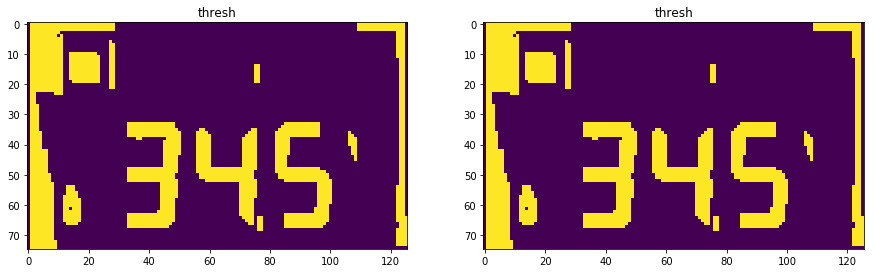

digits [3, 4, 5]


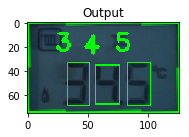

In [11]:
# find contours in the edge map, then sort them by their size in descending order
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
displayCnt = None
max_countour_area = image.shape[0] * image.shape[1]
min_area_found = max_countour_area * 0.1

# loop over the contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)

    # if the contour has four vertices, then we have found
    # the thermostat display
    if len(approx) == 4: # and (min_area_found < cv2.contourArea(approx)):
        displayCnt = approx
        break

# extract the thermostat display, apply a perspective transform to it
warped = four_point_transform(gray, displayCnt.reshape(4, 2))
output = four_point_transform(image, displayCnt.reshape(4, 2))

# threshold the warped image, then apply a series of morphological
# operations to cleanup the thresholded image
thresh = cv2.threshold(warped, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 5))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(15,15),)
plt.subplot(2, 2, 3), plt.title('thresh'), plt.imshow(thresh)

# find contours in the thresholded image, then initialize the
# digit contours lists
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
digitCnts = []

# loop over the digit area candidates
for c in cnts:
	# compute the bounding box of the contour
	(x, y, w, h) = cv2.boundingRect(c)

	# if the contour is sufficiently large, it must be a digit
    # 	if w >= 10 and h >= 20:
	if w >= 15 and (h >= 30 and h <= 40):
		digitCnts.append(c)
		# cv2.rectangle(thresh, (x, y), (x + w, y + h), (255, 0, 255), 1)

plt.subplot(2, 2, 4), plt.title('thresh'), plt.imshow(thresh)
plt.show()

# sort the contours from left-to-right, then initialize the actual digits themselves
digitCnts = contours.sort_contours(digitCnts,
	method="left-to-right")[0]
digits = []

# print("digitCnts:", digitCnts)

# loop over each of the digits
for c in digitCnts:
	# extract the digit ROI
	(x, y, w, h) = cv2.boundingRect(c)
	roi = thresh[y:y + h, x:x + w]

	# compute the width and height of each of the 7 segments
	# we are going to examine
	(roiH, roiW) = roi.shape
    # 	(dW, dH) = (int(roiW * 0.3), int(roiH * 0.14))
	(dW, dH) = (int(roiW * 0.25), int(roiH * 0.15))
	dHC = int(roiH * 0.05)

	# define the set of 7 segments
	segments = [
		((0, 0), (w, dH)),	# top
		((0, 0), (dW, h // 2)),	# top-left
		((w - dW, 0), (w, h // 2)),	# top-right
		((0, (h // 2) - dHC) , (w, (h // 2) + dHC)), # center
		((0, h // 2), (dW, h)),	# bottom-left
		((w - dW, h // 2), (w, h)),	# bottom-right
		((0, h - dH), (w, h)) # bottom
	]
	on = [0] * len(segments)

	# loop over the segments
	for (i, ((xA, yA), (xB, yB))) in enumerate(segments):
		# extract the segment ROI, count the total number of
		# thresholded pixels in the segment, and then compute
		# the area of the segment
		segROI = roi[yA:yB, xA:xB]
		total = cv2.countNonZero(segROI)
		area = (xB - xA) * (yB - yA)

		# draw the contour of seg
		# cv2.rectangle(output, (xA, yA), (xB, yB), (255, 0, 255), 1)

		# if the total number of non-zero pixels is greater than
		# 50% of the area, mark the segment as "on"
		# if total / float(area) > 0.35:
		if total / float(area) > 0.5:
			on[i] = 1

	# lookup the digit and draw it on the image
	digit = DIGITS_LOOKUP[tuple(on)]
	digits.append(digit)
	cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 1)
	cv2.putText(output, str(digit), (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 255, 0), 2)

# display the digits
# print(u"{}{}.{} \u00b0C".format(*digits))
print("digits", digits)
# cv2.imshow("Input", image)
cv2.imshow("Output", output)
plt.subplot(1, 2, 1), plt.title('Output'), plt.imshow(output)
plt.show()

example 2:

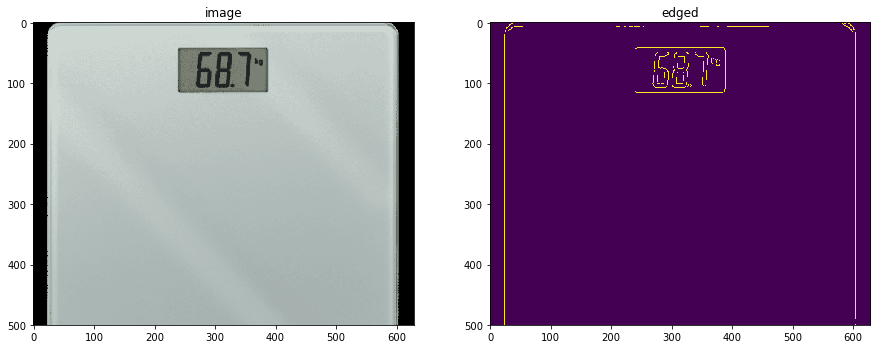

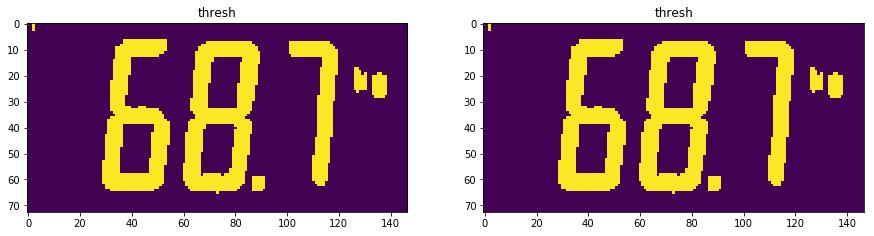

digits [6, 8, 7]


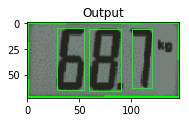